# Cargar los datos
<hr>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Descriptores_moleculares/Dataframes_descriptores/des_EGFR.csv")

# Visualizar datos
<hr>

In [3]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL65848,NaN,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,IC50,'=',4320.0,nM,12.915017,12.915017,0.069794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL431977,NaN,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,IC50,'=',1.0,nM,11.400854,11.400854,0.033442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,CHEMBL78257,TYRPHOSTIN 51,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,IC50,'=',800.0,nM,9.336538,9.336538,0.159750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL69960,NaN,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,IC50,'=',170.0,nM,13.542332,13.542332,0.041534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL29197,NaN,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,IC50,'=',70.0,nM,5.352814,5.352814,0.640826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Añadir el valor de 1000
<hr>

In [4]:
# 1 significa inhibidor
# 0 significa no inhibidor

def inhibidor(IC50):
    if IC50 > 1000:
        return 0
    else:
        return 1

In [5]:
df["Inhibidor"] = df["Standard Value"].apply(inhibidor)

In [6]:
df.to_csv("Datos_con_1000/EGFR_1000.csv", index=False)

# Escalado de datos
<hr>

In [8]:
col_names = df.columns[7:217]

In [9]:
descriptors = df[col_names]

In [10]:
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.915017,12.915017,0.069794,-0.256890,0.504608,17.914286,470.533,444.325,470.206639,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.400854,11.400854,0.033442,-0.160264,0.282387,15.085714,481.625,454.409,481.193631,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9.336538,9.336538,0.159750,-0.695453,0.352974,9.950000,268.232,260.168,268.059640,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.542332,13.542332,0.041534,-0.539617,0.489619,16.500000,482.903,462.743,482.126944,174.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.352814,5.352814,0.640826,0.640826,0.757494,10.500000,360.211,346.099,359.026939,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(descriptors)

In [13]:
df_scaled = pd.DataFrame(scaled_data, columns=descriptors.columns)

In [14]:
df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.802258,0.802258,0.060092,0.787235,0.525997,0.376012,0.164812,0.171046,0.164798,0.178022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.708201,0.708201,0.028793,0.801730,0.285677,0.316642,0.169884,0.176116,0.169825,0.175824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
2,0.579969,0.579969,0.137541,0.721447,0.362014,0.208846,0.072305,0.078472,0.072304,0.090110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.841226,0.841226,0.035760,0.744824,0.509788,0.346327,0.170469,0.180305,0.170252,0.173626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.332507,0.332507,0.551739,0.921900,0.799480,0.220390,0.114364,0.121669,0.113927,0.105495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,0.742010,0.742010,0.294545,0.774452,0.313930,0.227386,0.170286,0.179091,0.170277,0.180220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7404,0.779681,0.779681,0.139611,0.801446,0.302630,0.331527,0.188157,0.196203,0.188144,0.197802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7405,0.782510,0.782510,0.060948,0.779336,0.194542,0.329535,0.195021,0.203242,0.195007,0.204396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7406,0.811740,0.811740,0.199807,0.752586,0.164329,0.256644,0.222972,0.228395,0.222954,0.235165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtro de baja varianza
<hr>

In [15]:
df_scaled.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.802258,0.802258,0.060092,0.787235,0.525997,0.376012,0.164812,0.171046,0.164798,0.178022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.708201,0.708201,0.028793,0.801730,0.285677,0.316642,0.169884,0.176116,0.169825,0.175824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
2,0.579969,0.579969,0.137541,0.721447,0.362014,0.208846,0.072305,0.078472,0.072304,0.090110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.841226,0.841226,0.035760,0.744824,0.509788,0.346327,0.170469,0.180305,0.170252,0.173626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.332507,0.332507,0.551739,0.921900,0.799480,0.220390,0.114364,0.121669,0.113927,0.105495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
threshold = 0.01

In [17]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold)

In [18]:
selector.fit(df_scaled)

VarianceThreshold(threshold=0.01)

In [19]:
des_var= df_scaled.loc[:, selector.get_support()]

In [20]:
des_var

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_nitro,fr_oxazole,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_thiazole,fr_thiophene,fr_urea
0,0.802258,0.802258,0.060092,0.787235,0.525997,0.685554,0.845963,0.019509,0.510124,0.488524,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.708201,0.708201,0.028793,0.801730,0.285677,0.658531,0.801242,0.158506,0.424309,0.443364,...,0.0,0.0,0.00,0.5,0.0,0.333333,0.0,0.0,0.5,0.0
2,0.579969,0.579969,0.137541,0.721447,0.362014,0.462617,0.482609,0.018177,0.287346,0.727759,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.841226,0.841226,0.035760,0.744824,0.509788,0.726883,0.843990,0.188356,0.508979,0.488524,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.332507,0.332507,0.551739,0.921900,0.799480,0.591589,0.717391,0.582761,0.288055,0.639261,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,0.742010,0.742010,0.294545,0.774452,0.313930,0.699065,0.836957,0.019608,0.318836,0.608567,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7404,0.779681,0.779681,0.139611,0.801446,0.302630,0.686940,0.842809,0.019602,0.368666,0.611630,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7405,0.782510,0.782510,0.060948,0.779336,0.194542,0.734533,0.873913,0.019538,0.373907,0.607881,...,0.0,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
7406,0.811740,0.811740,0.199807,0.752586,0.164329,0.688318,0.797431,0.019993,0.441559,0.491204,...,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [21]:
des_var.to_csv("Baja_varianza/EGFR_var.csv", index=False)

# Determinación de correlación
<hr>

In [22]:
correlation_spearman = des_var.corr(method='spearman')

In [23]:
correlation_spearman

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_nitro,fr_oxazole,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_thiazole,fr_thiophene,fr_urea
MaxAbsEStateIndex,1.000000,1.000000,-0.399824,-0.646554,-0.406522,0.071796,0.012963,0.150626,0.397782,-0.360418,...,0.002837,0.012559,-0.083308,0.165055,0.139656,-0.008986,-0.007081,-0.032750,-0.024321,0.158829
MaxEStateIndex,1.000000,1.000000,-0.399824,-0.646554,-0.406522,0.071796,0.012963,0.150626,0.397782,-0.360418,...,0.002837,0.012559,-0.083308,0.165055,0.139656,-0.008986,-0.007081,-0.032750,-0.024321,0.158829
MinAbsEStateIndex,-0.399824,-0.399824,1.000000,0.434027,0.078270,-0.056432,0.047304,-0.069519,-0.288355,0.130627,...,-0.125595,0.003238,0.125735,-0.064396,-0.010259,0.124327,-0.041263,0.052065,-0.044410,-0.022440
MinEStateIndex,-0.646554,-0.646554,0.434027,1.000000,0.350017,0.026798,0.150587,-0.127564,-0.354499,0.180950,...,-0.161306,-0.051096,0.096531,-0.076905,-0.062318,0.037224,0.013550,0.017574,0.076568,-0.086776
qed,-0.406522,-0.406522,0.078270,0.350017,1.000000,0.189689,0.160062,-0.140516,-0.182191,0.254569,...,-0.161204,-0.031920,-0.065568,-0.038550,-0.167248,-0.005227,-0.000087,-0.080727,-0.014049,-0.029022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_pyridine,-0.008986,-0.008986,0.124327,0.037224,-0.005227,0.071003,0.076539,0.011588,-0.064456,0.005979,...,-0.052727,-0.019327,-0.050185,0.011275,0.007074,1.000000,0.013361,-0.058455,-0.031999,-0.014095
fr_sulfide,-0.007081,-0.007081,-0.041263,0.013550,-0.000087,0.029140,-0.002276,0.037428,0.033841,0.054610,...,0.000723,-0.014404,0.003958,-0.056583,-0.040706,0.013361,1.000000,-0.024111,-0.039368,-0.015118
fr_thiazole,-0.032750,-0.032750,0.052065,0.017574,-0.080727,-0.069677,-0.041645,0.030028,0.042694,0.000893,...,-0.006941,-0.021348,0.047846,0.006756,0.021502,-0.058455,-0.024111,1.000000,-0.037091,-0.015864
fr_thiophene,-0.024321,-0.024321,-0.044410,0.076568,-0.014049,0.141949,0.178781,0.086409,-0.019379,0.059515,...,-0.030158,-0.024698,-0.041581,-0.038788,-0.033954,-0.031999,-0.039368,-0.037091,1.000000,-0.029935


In [24]:
correlation_spearman_abs = correlation_spearman.abs()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


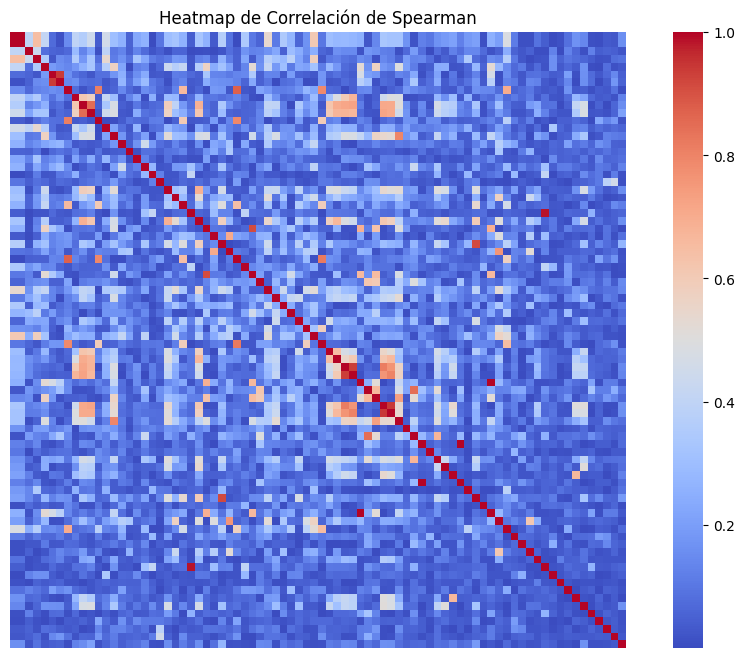

In [26]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [27]:
import random

to_keep = []

for col in correlation_spearman.columns:
    for idx in range(len(correlation_spearman)):
        # Usa .iloc para acceder a los elementos por posición
        if abs(correlation_spearman.iloc[idx][col]) > 0.85 and col != correlation_spearman.index[idx]:
            # Solo agregar si la variable no está ya en la lista para evitar duplicados
            if col not in to_keep and correlation_spearman.index[idx] not in to_keep:
                # Elegir aleatoriamente una variable del par
                selected_variable = random.choice([col, correlation_spearman.index[idx]])
                if selected_variable not in to_keep:
                    to_keep.append(selected_variable)

# Ahora 'to_keep' contendrá las variables seleccionadas
print("Variables seleccionadas:", to_keep)


Variables seleccionadas: ['MaxEStateIndex', 'FpDensityMorgan3', 'SlogP_VSA12', 'fr_nitrile', 'SMR_VSA7', 'fr_aniline', 'NumAliphaticRings', 'fr_benzene', 'NumSaturatedRings', 'fr_Nhpyrrole']


In [28]:
df_corr = des_var.drop(columns=to_keep)

In [29]:
correlation_spearman = df_corr.corr(method='spearman')

In [30]:
correlation_spearman_abs = correlation_spearman.abs()

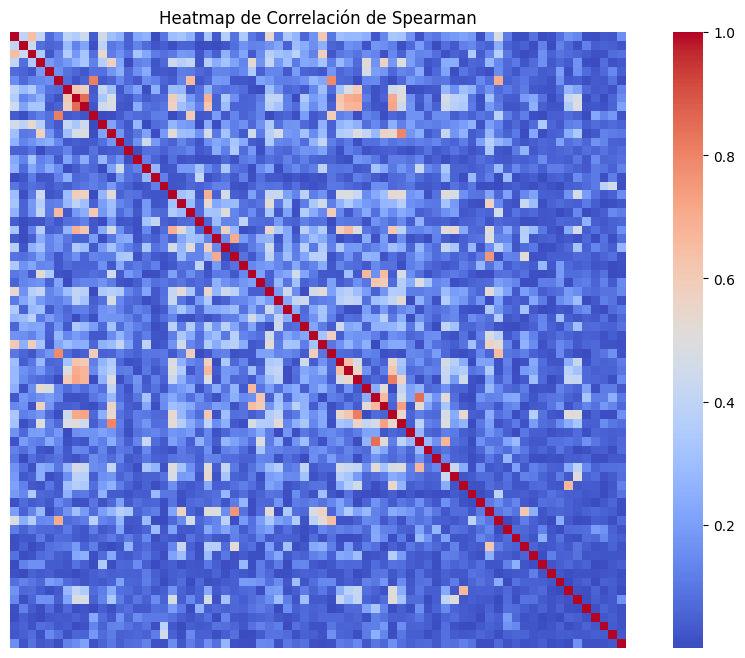

In [31]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [32]:
df_corr.to_csv("Alta_correlacion/EGFR_corr.csv", index=False)

# Determinación de normalidad
<hr>

In [33]:
dic_norm = {}

In [34]:
from scipy.stats import anderson

for i in df_corr.columns:
    result = anderson(df_corr[i], dist="norm")
    if result.statistic > result.critical_values[2]:
        resultado = 0 # No es normal
    else:
        resultado = 1 # Es normal
    dic_norm[i] = resultado

# Pruebas de hipótesis
<hr>

In [35]:
df_h = pd.concat((df_corr, df["Inhibidor"]), axis=1)

In [36]:
df_h

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,FpDensityMorgan2,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPLOW,BCUT2D_MRHI,...,fr_oxazole,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_thiazole,fr_thiophene,fr_urea,Inhibidor
0,0.802258,0.060092,0.787235,0.525997,0.685554,0.019509,0.510124,0.488524,0.432556,0.164017,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
1,0.708201,0.028793,0.801730,0.285677,0.658531,0.158506,0.424309,0.443364,0.452780,0.257872,...,0.0,0.00,0.5,0.0,0.333333,0.0,0.0,0.5,0.0,1
2,0.579969,0.137541,0.721447,0.362014,0.462617,0.018177,0.287346,0.727759,0.705276,0.092467,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,0.841226,0.035760,0.744824,0.509788,0.726883,0.188356,0.508979,0.488524,0.432556,0.164141,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.332507,0.551739,0.921900,0.799480,0.591589,0.582761,0.288055,0.639261,0.745498,0.460285,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,0.742010,0.294545,0.774452,0.313930,0.699065,0.019608,0.318836,0.608567,0.659200,0.129231,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
7404,0.779681,0.139611,0.801446,0.302630,0.686940,0.019602,0.368666,0.611630,0.561684,0.127676,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
7405,0.782510,0.060948,0.779336,0.194542,0.734533,0.019538,0.373907,0.607881,0.561597,0.129445,...,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,1
7406,0.811740,0.199807,0.752586,0.164329,0.688318,0.019993,0.441559,0.491204,0.516061,0.130505,...,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [37]:
grupo_inhibidor = df_corr[df_h["Inhibidor"] == 1]

In [38]:
grupo_inhibidor

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,FpDensityMorgan2,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPLOW,BCUT2D_MRHI,...,fr_nitro,fr_oxazole,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_thiazole,fr_thiophene,fr_urea
1,0.708201,0.028793,0.801730,0.285677,0.658531,0.158506,0.424309,0.443364,0.452780,0.257872,...,0.0,0.0,0.00,0.5,0.0,0.333333,0.0,0.0,0.5,0.0
2,0.579969,0.137541,0.721447,0.362014,0.462617,0.018177,0.287346,0.727759,0.705276,0.092467,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.841226,0.035760,0.744824,0.509788,0.726883,0.188356,0.508979,0.488524,0.432556,0.164141,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.332507,0.551739,0.921900,0.799480,0.591589,0.582761,0.288055,0.639261,0.745498,0.460285,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.349537,0.227448,0.865399,0.761887,0.634579,0.021452,0.377294,0.561192,0.638703,0.114040,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,0.742010,0.294545,0.774452,0.313930,0.699065,0.019608,0.318836,0.608567,0.659200,0.129231,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7404,0.779681,0.139611,0.801446,0.302630,0.686940,0.019602,0.368666,0.611630,0.561684,0.127676,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7405,0.782510,0.060948,0.779336,0.194542,0.734533,0.019538,0.373907,0.607881,0.561597,0.129445,...,0.0,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
7406,0.811740,0.199807,0.752586,0.164329,0.688318,0.019993,0.441559,0.491204,0.516061,0.130505,...,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [39]:
grupo_no_inhibidor = df_corr[df_h["Inhibidor"] == 0]

In [40]:
grupo_no_inhibidor

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,FpDensityMorgan2,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPLOW,BCUT2D_MRHI,...,fr_nitro,fr_oxazole,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_thiazole,fr_thiophene,fr_urea
0,0.802258,0.060092,0.787235,0.525997,0.685554,0.019509,0.510124,0.488524,0.432556,0.164017,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.845224,0.042078,0.743879,0.369987,0.726088,0.188356,0.343699,0.520221,0.501693,0.159012,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
7,0.714383,0.058644,0.693732,0.417782,0.273458,0.167216,0.415435,0.672039,0.711632,0.423639,...,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10,0.395407,0.246566,0.782812,0.479585,0.547738,0.188386,0.364811,0.545340,0.636379,0.163925,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
14,0.829267,0.113787,0.778199,0.336379,0.631509,0.188356,0.250723,0.644759,0.693030,0.160413,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,0.779204,0.187399,0.788387,0.265728,0.455452,0.019852,0.288144,0.630895,0.697389,0.133335,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7366,0.839881,0.070285,0.700297,0.190260,0.598449,0.158800,0.557303,0.486888,0.391420,0.341609,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,0.0,0.0,1.0
7370,0.360776,0.399152,0.895315,0.564714,0.580841,0.158506,0.296728,0.644113,0.673364,0.253044,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
7371,0.746750,0.092330,0.205734,0.242155,0.769124,0.582771,0.387358,0.651321,0.477795,0.462947,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [41]:
p_values = {}

In [42]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

for i in df_h.columns:
    if i == "Inhibidor":
        break
    if dic_norm == 0:
        estadistica, p_valor = ttest_ind(grupo_inhibidor[i], grupo_no_inhibidor[i])
    else:
        estadistica, p_valor = mannwhitneyu(grupo_inhibidor[i], grupo_no_inhibidor[i])

    if p_valor > 0.05:
        p_values[i] = 0 # Los grupos son iguales y por lo tanto, no es significativa
    else:
        p_values[i] = 1 # Los grupos son diferentes y por lo tanto, es significativa

In [43]:
p_values

{'MaxAbsEStateIndex': 1,
 'MinAbsEStateIndex': 1,
 'MinEStateIndex': 1,
 'qed': 1,
 'FpDensityMorgan2': 1,
 'BCUT2D_MWHI': 1,
 'BCUT2D_CHGHI': 1,
 'BCUT2D_CHGLO': 1,
 'BCUT2D_LOGPLOW': 1,
 'BCUT2D_MRHI': 1,
 'BCUT2D_MRLOW': 1,
 'BalabanJ': 1,
 'PEOE_VSA10': 1,
 'PEOE_VSA11': 0,
 'PEOE_VSA13': 1,
 'PEOE_VSA3': 1,
 'PEOE_VSA4': 1,
 'PEOE_VSA5': 1,
 'PEOE_VSA8': 1,
 'PEOE_VSA9': 1,
 'SMR_VSA10': 1,
 'SMR_VSA2': 1,
 'SMR_VSA6': 1,
 'SMR_VSA9': 0,
 'SlogP_VSA10': 1,
 'SlogP_VSA11': 0,
 'SlogP_VSA4': 0,
 'SlogP_VSA6': 1,
 'SlogP_VSA8': 1,
 'EState_VSA3': 1,
 'EState_VSA4': 1,
 'EState_VSA6': 1,
 'EState_VSA7': 0,
 'EState_VSA8': 1,
 'EState_VSA9': 1,
 'VSA_EState1': 1,
 'VSA_EState10': 1,
 'VSA_EState8': 1,
 'FractionCSP3': 1,
 'NumAliphaticHeterocycles': 1,
 'NumAromaticCarbocycles': 1,
 'NumAromaticHeterocycles': 1,
 'NumAromaticRings': 1,
 'NumSaturatedHeterocycles': 1,
 'RingCount': 1,
 'fr_ArN': 1,
 'fr_Ar_N': 1,
 'fr_Ar_NH': 1,
 'fr_C_S': 1,
 'fr_NH0': 1,
 'fr_Ndealkylation1': 1,
 'fr_

In [44]:
p_df = pd.Series(p_values)

In [45]:
p_df.value_counts()

1    61
0     9
Name: count, dtype: int64

In [46]:
p_names = p_df[p_df == 1].index

In [47]:
p_names

Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed',
       'FpDensityMorgan2', 'BCUT2D_MWHI', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ',
       'PEOE_VSA10', 'PEOE_VSA13', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5',
       'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA6',
       'SlogP_VSA10', 'SlogP_VSA6', 'SlogP_VSA8', 'EState_VSA3', 'EState_VSA4',
       'EState_VSA6', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1',
       'VSA_EState10', 'VSA_EState8', 'FractionCSP3',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumSaturatedHeterocycles', 'RingCount', 'fr_ArN', 'fr_Ar_N',
       'fr_Ar_NH', 'fr_C_S', 'fr_NH0', 'fr_Ndealkylation1',
       'fr_Ndealkylation2', 'fr_alkyl_halide', 'fr_aryl_methyl', 'fr_ether',
       'fr_halogen', 'fr_hdrzone', 'fr_morpholine', 'fr_nitro', 'fr_oxazole',
       'fr_para_hydroxylation', 'fr_pipe

In [48]:
df_p_final = df_h[p_names]

In [49]:
df_p_final

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,FpDensityMorgan2,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPLOW,BCUT2D_MRHI,...,fr_hdrzone,fr_morpholine,fr_nitro,fr_oxazole,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_sulfide,fr_thiophene,fr_urea
0,0.802258,0.060092,0.787235,0.525997,0.685554,0.019509,0.510124,0.488524,0.432556,0.164017,...,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.708201,0.028793,0.801730,0.285677,0.658531,0.158506,0.424309,0.443364,0.452780,0.257872,...,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.0,0.5,0.0
2,0.579969,0.137541,0.721447,0.362014,0.462617,0.018177,0.287346,0.727759,0.705276,0.092467,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.841226,0.035760,0.744824,0.509788,0.726883,0.188356,0.508979,0.488524,0.432556,0.164141,...,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.332507,0.551739,0.921900,0.799480,0.591589,0.582761,0.288055,0.639261,0.745498,0.460285,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,0.742010,0.294545,0.774452,0.313930,0.699065,0.019608,0.318836,0.608567,0.659200,0.129231,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7404,0.779681,0.139611,0.801446,0.302630,0.686940,0.019602,0.368666,0.611630,0.561684,0.127676,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7405,0.782510,0.060948,0.779336,0.194542,0.734533,0.019538,0.373907,0.607881,0.561597,0.129445,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7406,0.811740,0.199807,0.752586,0.164329,0.688318,0.019993,0.441559,0.491204,0.516061,0.130505,...,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [50]:
df_p_final.to_csv("Prueba_hipotesis/EGFR_h.csv", index=False)